In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

VISUALIZATION_PATH = "./graphics/"

font_path = '../Helvetica Regular.otf'
bold_font_path = "../Helvetica CE Bold.otf"
normal_font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=bold_font_path)

In [125]:
data = pd.read_parquet("../data/data_parquet/weights.parquet", engine="pyarrow")

In [126]:
data_modified= data.map(lambda x: None if isinstance(x, np.ndarray) and x.size == 0 else x)
data_modified["females"] = data_modified["females"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["males"] = data_modified["males"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["infants"] = data_modified["infants"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["children"] = data_modified["children"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["total_pax"] = data_modified["total_pax"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["economy"] = data_modified["economy"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["business"] = data_modified["business"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["total_bags"] = data_modified["total_bags"].apply(lambda x: x[-1] if x is not None else 0)
data_modified["total_bag_weights"] = data_modified["total_bag_weights"].apply(lambda x: x[-1] if x is not None else 0)

data_modified["j_distributions"] = data_modified["j_distributions"].apply(lambda x: np.sum([int(i) for i in x]) if x is not None else 0)
data_modified["y_distributions"] = data_modified["y_distributions"].apply(lambda x: np.sum([int(i) for i in x]) if x is not None else 0)
data_modified["j_capacities"] = data_modified["j_capacities"].apply(lambda x: np.sum([int(i) for i in x]) if x is not None else 0)
data_modified["y_capacities"] = data_modified["y_capacities"].apply(lambda x: np.sum([int(i) for i in x]) if x is not None else 0)

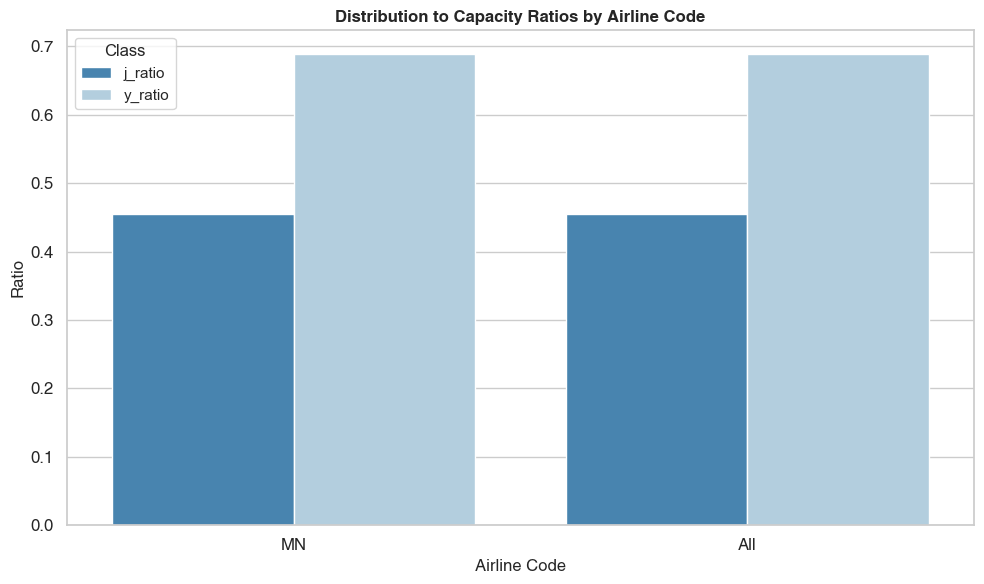

In [127]:
capacities_distribution_ratio = data_modified[['j_distributions', 'y_distributions', 'j_capacities', 'y_capacities', 'airline_code']]
capacities_distribution_ratio = capacities_distribution_ratio.groupby("airline_code").sum() 

capacities_distribution_ratio['j_ratio'] = capacities_distribution_ratio['j_distributions'] / capacities_distribution_ratio['j_capacities']
capacities_distribution_ratio['y_ratio'] = capacities_distribution_ratio['y_distributions'] / capacities_distribution_ratio['y_capacities']

other_data = data_modified[['j_distributions', 'y_distributions', 'j_capacities', 'y_capacities']]
other_data = other_data.sum(axis=0).to_frame().T
other_data['airline_code'] = 'All'
other_data['j_ratio'] = other_data['j_distributions'] / other_data['j_capacities']
other_data['y_ratio'] = other_data['y_distributions'] / other_data['y_capacities']


capacities_distribution_ratio = capacities_distribution_ratio.reset_index()
capacities_distribution_ratio = pd.concat([capacities_distribution_ratio, other_data], ignore_index=True)



# Melt the DataFrame to long format for Seaborn plotting
data_melted = pd.melt(capacities_distribution_ratio, id_vars='airline_code', value_vars=['j_ratio', 'y_ratio'],
                      var_name='Class', value_name='Ratio')


# Plot the ratios using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='airline_code', y='Ratio', hue='Class', data=data_melted, palette='Blues_r')
plt.title('Distribution to Capacity Ratios by Airline Code', fontproperties=bold_font)
plt.xlabel('Airline Code', fontproperties=normal_font)
plt.ylabel('Ratio', fontproperties=normal_font)
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.savefig(f"{VISUALIZATION_PATH}Distribution to Capacity Ratios by Airline Code.svg")
plt.xticks(fontproperties=normal_font);
plt.yticks(fontproperties=normal_font);
plt.tight_layout()
plt.show()
# title bold, x achsen beschriften

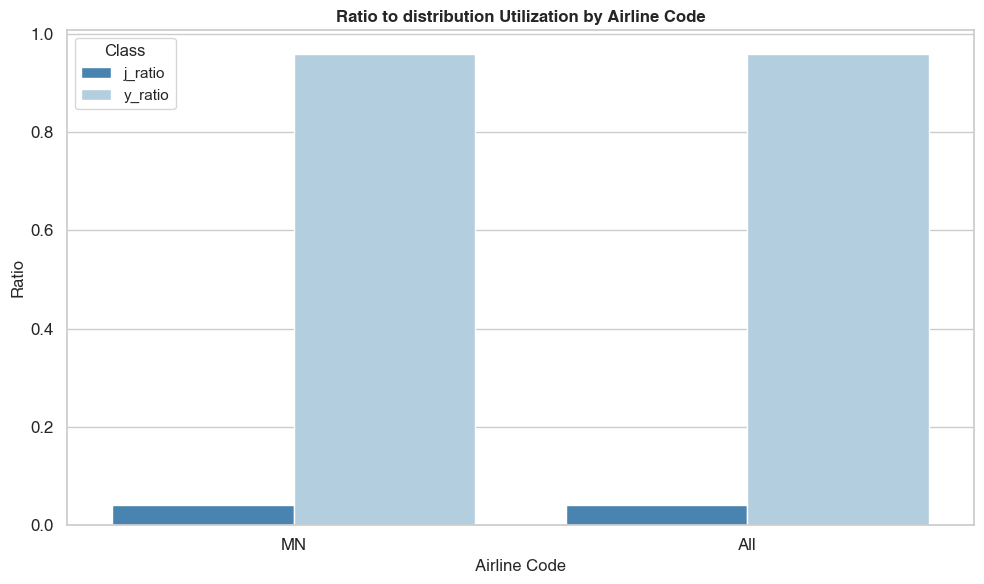

In [128]:
capacities_distribution_ratio = data_modified[['j_distributions', 'y_distributions', 'j_capacities', 'y_capacities', 'airline_code']]
capacities_distribution_ratio = capacities_distribution_ratio.groupby("airline_code").sum() 

capacities_distribution_ratio['j_ratio'] = capacities_distribution_ratio['j_distributions'] / (capacities_distribution_ratio['j_distributions'] + capacities_distribution_ratio['y_distributions'])
capacities_distribution_ratio['y_ratio'] = capacities_distribution_ratio['y_distributions'] / (capacities_distribution_ratio['y_distributions'] + capacities_distribution_ratio['j_distributions'])

other_data = data_modified[['j_distributions', 'y_distributions', 'j_capacities', 'y_capacities']]
other_data = other_data.sum(axis=0).to_frame().T
other_data['airline_code'] = 'All'
other_data['j_ratio'] = other_data['j_distributions'] / (other_data['j_distributions'] + other_data['y_distributions'])
other_data['y_ratio'] = other_data['y_distributions'] / (other_data['y_distributions'] + other_data['j_distributions'])


capacities_distribution_ratio = capacities_distribution_ratio.reset_index()
capacities_distribution_ratio = pd.concat([capacities_distribution_ratio, other_data], ignore_index=True)


# Melt the DataFrame to long format for Seaborn plotting
data_melted = pd.melt(capacities_distribution_ratio, id_vars='airline_code', value_vars=['j_ratio', 'y_ratio'],
                      var_name='Class', value_name='Ratio')


# Plot the ratios using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='airline_code', y='Ratio', hue='Class', data=data_melted, palette='Blues_r')
plt.title('Ratio to distribution Utilization by Airline Code', fontproperties=bold_font)
plt.xlabel('Airline Code', fontproperties=normal_font)
plt.ylabel('Ratio', fontproperties=normal_font)
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.xticks(fontproperties=normal_font);
plt.yticks(fontproperties=normal_font);
plt.tight_layout()
plt.savefig(f"{VISUALIZATION_PATH}Ratio to distribution Utilization by Airline Code.svg")
plt.show()

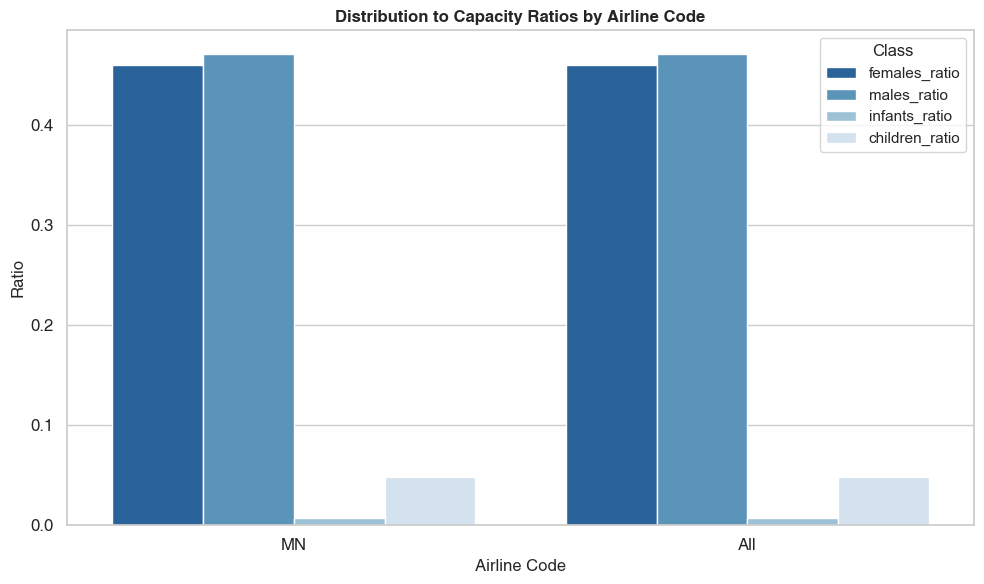

In [129]:
persons_ratio = data_modified[["females", "males", "infants", "children", "total_pax", "airline_code"]].copy()
persons_ratio = persons_ratio.groupby("airline_code").sum() 
persons_ratio["females_ratio"] = persons_ratio["females"] / persons_ratio["total_pax"]
persons_ratio["males_ratio"] = persons_ratio["males"] / persons_ratio["total_pax"]
persons_ratio["children_ratio"] = persons_ratio["children"] / persons_ratio["total_pax"]
persons_ratio["infants_ratio"] = persons_ratio["infants"] / persons_ratio["total_pax"]


other_data = data_modified[["females", "males", "infants", "children", "total_pax"]].copy()
other_data = other_data.sum(axis=0).to_frame().T
other_data['airline_code'] = 'All'
other_data["females_ratio"] = other_data["females"] / other_data["total_pax"]
other_data["males_ratio"] = other_data["males"] / other_data["total_pax"]
other_data["children_ratio"] = other_data["children"] / other_data["total_pax"]
other_data["infants_ratio"] = other_data["infants"] / other_data["total_pax"]


persons_ratio = persons_ratio.reset_index()
persons_ratio = pd.concat([persons_ratio, other_data], ignore_index=True)



# Melt the DataFrame to long format for Seaborn plotting
data_melted = pd.melt(persons_ratio, id_vars='airline_code', value_vars=['females_ratio', 'males_ratio', 'infants_ratio', 'children_ratio'],
                      var_name='Class', value_name='Ratio')


# Plot the ratios using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='airline_code', y='Ratio', hue='Class', data=data_melted, palette='Blues_r')
plt.title('Distribution to Capacity Ratios by Airline Code', fontproperties=bold_font)
plt.xlabel('Airline Code', fontproperties=normal_font)
plt.ylabel('Ratio', fontproperties=normal_font)
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.xticks(fontproperties=normal_font);
plt.yticks(fontproperties=normal_font);
plt.tight_layout()
plt.savefig(f"{VISUALIZATION_PATH}Distribution to Capacity Ratios by Airline Cod.svg")
plt.show()